<a href="https://colab.research.google.com/github/badrinarayanan02/deep_learning/blob/main/2348507_DLLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptron Learning and Gradient Descent Algorithms**

# **Task 1**

Create a Python implementation of the perceptron learning algorithm to train neural networks for the following boolean functions: a) AND, b) OR, c) NAND, d) XOR. Begin by manually assigning weights and displaying the number of errors between positive and negative outcomes. Then, utilize the perceptron learning algorithm to adjust the weights and eliminate these errors by finding the optimal weight configuration.

In [49]:
import numpy as np
import matplotlib.pyplot as plt

Initializing the weights

In [50]:
def initialize_weights():
  return np.random.rand(3)

Genrating inputs for boolean gates

In [51]:
def generate_inputs(gate):
  if gate == 'AND':
    return np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
  elif gate == 'OR':
    return np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
  elif gate == 'NAND':
    return np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
  elif gate == 'XOR':
    return np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])

Genrating target outputs for boolean gates

In [52]:
def target_outputs(gate):
  if gate == 'AND':
    return np.array([0,0,0,1])
  elif gate == 'OR':
    return np.array([0,1,1,1])
  elif gate == 'NAND':
    return np.array([1,1,1,0])
  elif gate == 'XOR':
    return np.array ([0,1,1,0])

Defining Step Function for Binary Output

In [53]:
def step(x):
    # if weighted_sum >= 0:
    #     return 1
    # else:
    #     return 0
    return np.where(x >= 0, 1, 0)

Perceptron Prediction

In [54]:
def perceptron(input,weights):
  summation = np.dot(input,weights)
  return step(summation)

Creating perceptron learning algorithm

In [55]:
def perceptron_learning(inputs,targets,weights,learning_rate = 0.1,epochs = 1000):
  errors = []

  for epoch in range(epochs):
    total_error = 0

    for i in range(len(inputs)):
      prediction = perceptron(inputs[i],weights)
      error = targets[i] - prediction # Calculating the error
      weights += learning_rate * error * inputs[i] # Updating the weights
      total_error += np.abs(error)
    errors.append(total_error)

  return weights,errors

Plotting errors during training

In [56]:
def plot_errors(errors):
  plt.plot(range(1,len(errors)+1),errors)
  plt.xlabel('Epochs')
  plt.ylabel('Total Error')
  plt.title("Perceptron Learning Algorithm Convergence")
  plt.show()

Main Functionality to train and test perceptron for different gates

In [57]:
def trainTestPerceptron(gate):
  weights = initialize_weights()
  inputs = generate_inputs(gate)
  targets = target_outputs(gate)

  print(f"Training for {gate} gate:")
  print("Initial Weights: ",weights)

  initial_errors = sum(abs(targets-perceptron(inputs,weights)))
  print("Initial Errors: ",initial_errors)

  optimal_weights, errors = perceptron_learning(inputs,targets,weights)
  print("Optimal Weights: ", optimal_weights)

  plot_errors(errors)

  test_errors = sum(abs(targets-perceptron(inputs,optimal_weights)))
  print("Test Errors with Optimal Weights: ",test_errors)

  print("\nPredictions for", gate, "gate:")
  for input_vector in inputs:
      prediction = perceptron(input_vector, optimal_weights)
      print(f"Input: {input_vector[1:]}, Predicted Output: {prediction}")

Training for AND gate:
Initial Weights:  [0.82421847 0.13154374 0.9056499 ]
Initial Errors:  3
Optimal Weights:  [-0.37578153  0.13154374  0.3056499 ]


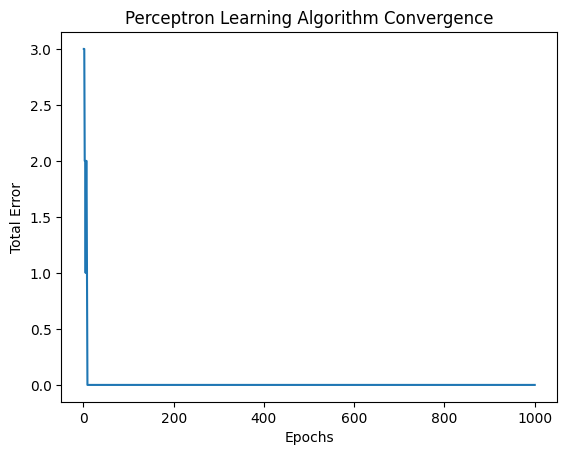

Test Errors with Optimal Weights:  0

Predictions for AND gate:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1
Training for OR gate:
Initial Weights:  [0.06082877 0.93694888 0.28622122]
Initial Errors:  1
Optimal Weights:  [-0.03917123  0.93694888  0.28622122]


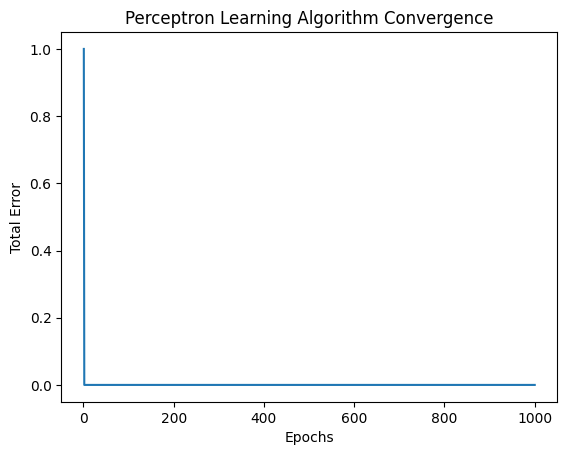

Test Errors with Optimal Weights:  0

Predictions for OR gate:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1
Training for NAND gate:
Initial Weights:  [0.84105972 0.9088564  0.94341112]
Initial Errors:  1
Optimal Weights:  [ 0.24105972 -0.1911436  -0.05658888]


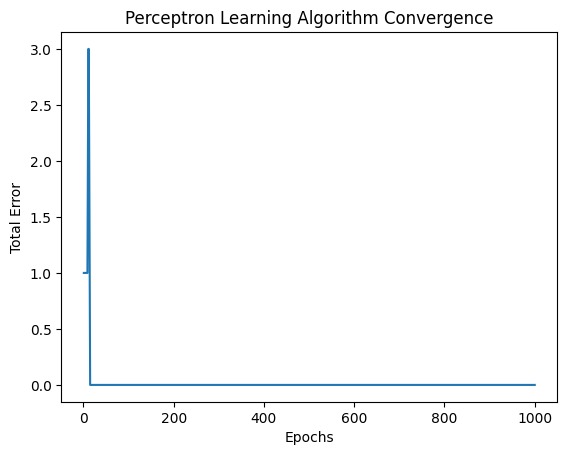

Test Errors with Optimal Weights:  0

Predictions for NAND gate:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0
Training for XOR gate:
Initial Weights:  [0.84640238 0.9909734  0.59072318]
Initial Errors:  2
Optimal Weights:  [ 0.04640238 -0.1090266  -0.00927682]


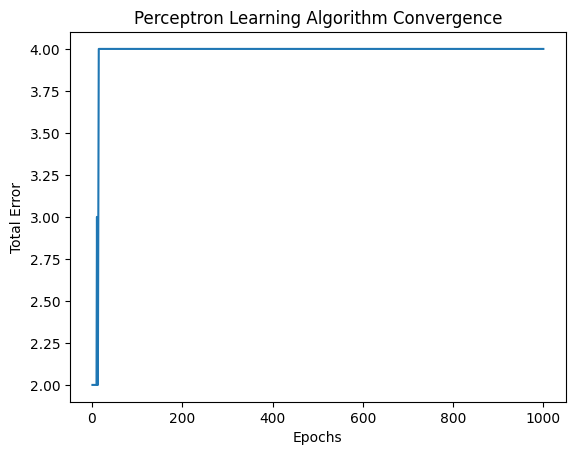

Test Errors with Optimal Weights:  2

Predictions for XOR gate:
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


In [58]:
trainTestPerceptron('AND')
trainTestPerceptron('OR')
trainTestPerceptron('NAND')
trainTestPerceptron('XOR')

# **Conclusion**

**AND Gate**

Initial Weights: [0.82421847 0.13154374 0.9056499]

Initial Errors: 3

Optimal Weights: [-0.37578153  0.13154374  0.3056499]

Test Errors with Optimal Weights: 0


**Explanation**

Initially, the weights are random, and the perceptron predicts incorrectly for all inputs, resulting in 3 errors.
After training, the weights are adjusted, and the perceptron successfully predicts the AND gate for all inputs, achieving 0 test errors.

**OR Gate**

Initial Weights: [0.06082877 0.93694888 0.28622122]

Initial Errors: 1

Optimal Weights: [-0.03917123  0.93694888  0.28622122]

Test Errors with Optimal Weights: 0


**Explanation**

Initially, there is one error in prediction.
After training, the weights are adjusted, and the perceptron correctly predicts the OR gate for all inputs, achieving 0 test errors.

**NAND Gate**

Initial Weights: [0.84105972 0.9088564  0.943411128]

Initial Errors: 1

Optimal Weights: [0.24105972 -0.1911436  -0.05658888]

Test Errors with Optimal Weights: 0


**Explanation**

Initially, there is one error in prediction.
After training, the weights are adjusted, and the perceptron correctly predicts the NAND gate for all inputs, achieving 0 test errors.

**XOR Gate**

Initial Weights: [0.84640238 0.9909734  0.59072318]

Initial Errors: 2

Optimal Weights: [0.04640238 -0.1090266  -0.00927682]

Test Errors with Optimal Weights: 2


**Explanation**

Initially, there are two errors in prediction.
After training, the weights are adjusted, but the XOR gate is a more complex function, and the perceptron struggles to correctly predict XOR, resulting in 2 test errors.

# **Task 2**

Develop a Python script to utilize the gradient descent algorithm for locating the global minima of the following equations. Additionally, ensure the program prints the number of iterations taken to identify the global minima.
Note:Visualize all the results in graph

i) f(x) = x^2 - 2x + 2

ii) f(x, y) = (1 - x)^2 + 100(y - x^2)^2